In [4]:
import matplotlib as mpl, matplotlib.pyplot as plt, matplotlib.colors as mplcolors, matplotlib.patheffects as pe, matplotlib.ticker as ticker
import numpy as np
import sys
sys.path.append('../../notebooks')  # import neurodyn
from neurodyn import *
from matplotlib_tufte import *
setup()

%matplotlib inline

mpl.use('svg')

def mktrans(fig, ax):
	"""Makes figure and axes transparent"""
	fig.patch.set_facecolor('#FFFFFF00')
	ax.patch.set_facecolor('#FFFFFF00')

In [9]:
def plot_trace(mapping_cls, nrec, do_trace: bool = True, do_numbers: bool = True):
	F = ColumnMapping.new_nrec(nrec).inverse_samples(centered=True)
	mapping = mapping_cls.new_nrec(nrec)
	alpha = mapping(F)
	
	fig, ax = plt.subplots(facecolor='#FFFFFF00')
	im = ax.imshow(alpha.reshape((2**nrec, 2**nrec)).T, origin='lower', vmin=0, vmax=1, extent=(0,1,0,1), interpolation='none')
	mapping_letter = { ZMapping: 'Z', ColumnMapping: 'C', AntiZMapping: 'A' }.get(mapping_cls, 'S')
	plt.colorbar(im, ax=ax, label=f'$\\alpha={mapping_letter}^{{n}}(v_1, v_2)$')
	if do_trace:
		# plot the trace
		ax.plot(*F[np.argsort(alpha)].T)
	# add the bin numbers
	if do_numbers:
		# hide trace at numbering location
		ax.scatter(*F.T, s=250, c=alpha, cmap='viridis', vmin=0, vmax=1, zorder=10)  
		for xy, i in zip(F[np.argsort(alpha)], range(1, 4**nrec+1)):
			ax.annotate(i, xy=xy, va='center_baseline', ha='center', zorder=20, color='white', fontweight='bold',
				path_effects=[pe.withStroke(linewidth=1, foreground='black')])
	ax.set_aspect('equal')
	ax.set_xlabel('$v_1$'); ax.set_ylabel('$v_2$')
	ax.set_xlim((0,1)); ax.set_ylim((0,1))
	ax.xaxis.set_major_locator(ticker.MultipleLocator(1/2**2))
	ax.yaxis.set_major_locator(ticker.MultipleLocator(1/2**2))
	# for x in np.linspace(0, 1, 2**nrec+1): ax.axvline(x, ymin=0, ymax=1, color='tab:gray', linewidth=0.5, zorder=0, clip_on=False)
	# for y in np.linspace(0, 1, 2**nrec+1): ax.axhline(y, xmin=0, xmax=1, color='tab:gray', linewidth=0.5, zorder=0, clip_on=False)
	breathe()
	return fig, ax

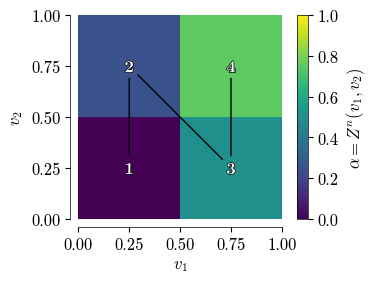

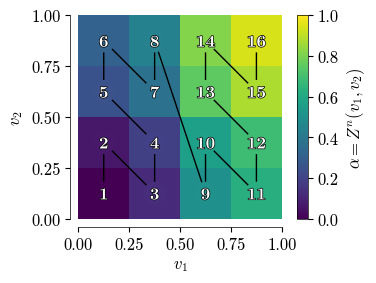

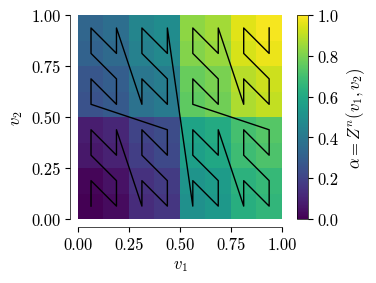

/tmp/ipykernel_17842/2723398276.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(facecolor='#FFFFFF00')


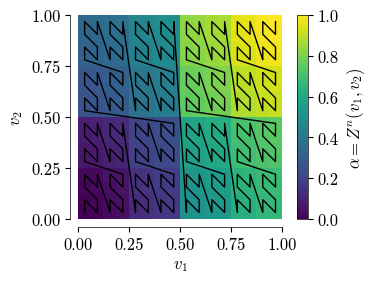

In [17]:
for n in (1,2,3,4):
	fig, ax = plot_trace(ZMapping, nrec=n, do_numbers=n <= 2)
	fig.savefig(f'z-{n}.svg')
	fig.savefig(f'z-{n}.png', dpi=600)
	display(fig)